## Bitcoin Event Analysis

In [13]:
# Import Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# Read data into dataframes

df=pd.read_csv("C:\\Users\\palla\\Downloads\\crypto\\Event Analysis\\bitcoin_event.csv",parse_dates = ['Date'],low_memory=False)
df_doge=pd.read_csv("C:\\Users\\palla\\Downloads\\crypto\\Event Analysis\\coin_Dogecoin.csv")
df_eth=pd.read_csv("C:\\Users\\palla\\Downloads\\crypto\\Event Analysis\\coin_Ethereum.csv")
df_av=pd.read_csv("C:\\Users\\palla\\Downloads\\crypto\\Event Analysis\\coin_Aave.csv")

In [15]:
# Getting the average price in a day for Bitcoin

df['price_in_day'] = (df['Close']+df["Open"])/2

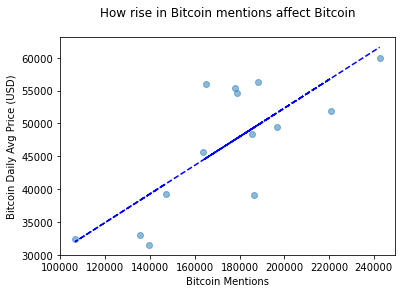

In [16]:
# Relation - Bitcoin Mentions vs Price of Bitcoin

df2=df[df.event_occur==1]
plt.scatter(df2['mention_volume'], df2['price_in_day'], alpha=0.5)
z = np.polyfit(df2['mention_volume'], df2['price_in_day'], 1)
p = np.poly1d(z)
plt.plot(df2['mention_volume'],p(df2['mention_volume']),"b--")
plt.xlabel('Bitcoin Mentions')
plt.ylabel('Bitcoin Daily Avg Price (USD)')
plt.title('How rise in Bitcoin mentions affect Bitcoin\n')
plt.show()

In [17]:
# Retrieve the event days

def fun(df,i):
    m=0
    index=0
    for j in range(i,i+2):
        diff=abs(df['mention_volume'][j-1]-df['mention_volume'][j])
        
        if(diff>m):
            index=j
        m=max(diff,m)
       
    return(index)
    
list_of_days=[]    
for i in range(len(df)):
    if df['event_occur'][i]==1:
        print(df['event_name'][i])
        j=fun(df,i)
        list_of_days.append(j)

list_of_days     

jp morgan positive valuation
crypto downnnnn
regulators lack of confidence
Musk tweeting #bitcoin
Tesla taps in for a big-time bounce
Bitcoin breaks $50k!
Bitcoin breaks $1 trillion
Cboe might list Bitcoin
PayPal moves into Bitcoin
Confiscated bitcoin auction
Morgan Stanley offers bitcoin access
Bitcoins now buy Teslas
VISA allows cryptocurrency USD coin for transactions
Coinbase goes public


[5, 10, 26, 27, 38, 46, 49, 59, 62, 69, 75, 82, 87, 102]

In [18]:
df['e']=0
for i in list_of_days:
    df['e'][i]=1
df_e=df[df.e==1]


<ipython-input-18-1d25e7851b3f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['e'][i]=1


In [19]:
# Set the peak and Valley index for Bitcoin. 
# Peak - Highest mention volumes
# Valley - Lowest Mention volumes

def peaks_valleys(df):
    peaks=[]
    valleys=[]
    index=0
    for i in range(1,len(df)-1):
        if((df['mention_volume'][i]-df['mention_volume'][i-1])>=.2*df['mention_volume'][i-1]):
            if((df['mention_volume'][i]-df['mention_volume'][i+1])>=0):
                index=i
                if index not in peaks:
                    peaks.append(index)
        if((df['mention_volume'][i-1]-df['mention_volume'][i])>=0.20*df['mention_volume'][i-1]):
            if((df['mention_volume'][i+1]-df['mention_volume'][i])>=0):
                index=i
                if index not in valleys:
                    valleys.append(index)
                       
                            
    return(peaks,valleys)
peaks,valleys=peaks_valleys(df)

peaks,valleys

([1, 6, 10, 20, 24, 28, 31, 35, 38, 50, 53, 59, 71, 75, 82, 89, 94, 107, 115],
 [11, 19, 22, 30, 36, 43, 48, 72, 78, 106, 113])

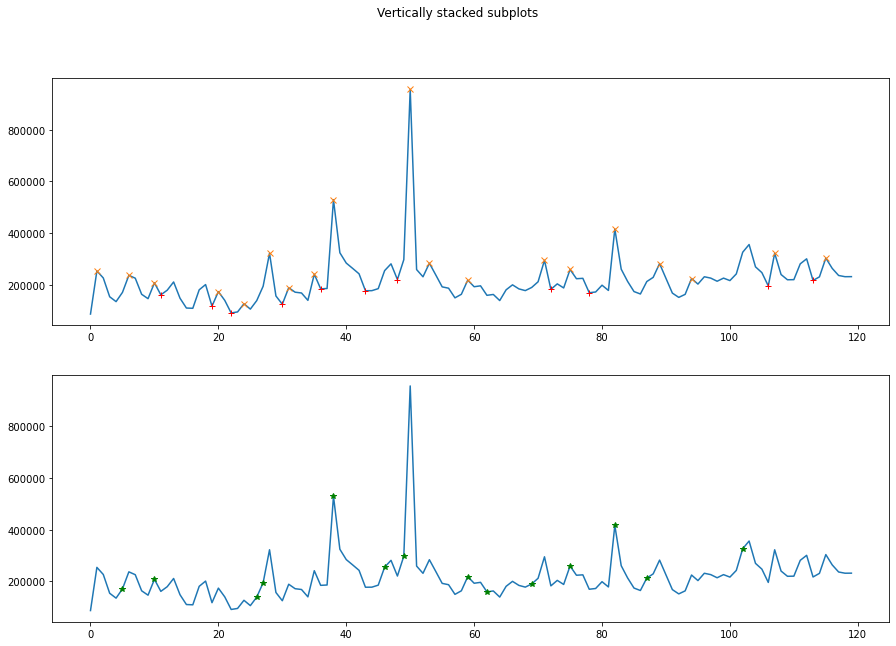

In [23]:
# Highest Number of mentions coaligning with the highest price in the graph

fig, axs = plt.subplots(2,figsize=(15, 10))
fig.suptitle('Vertically stacked subplots')

axs[0].plot(df['mention_volume'])
axs[1].plot(df['mention_volume'])
axs[0].plot(peaks,x[peaks],'x')
axs[0].plot(valleys,x[valleys],'+',color='red')
axs[1].plot(list_of_days,x[list_of_days],"*",color='green')

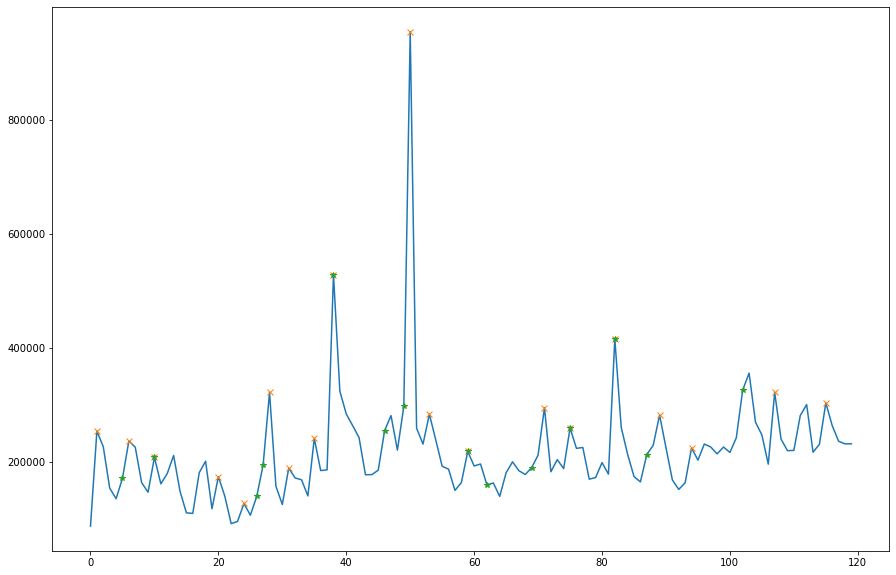

In [21]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,10)) 
plt.plot(df['mention_volume'])
x=df['mention_volume']
plt.plot(peaks,x[peaks],'x')
plt.plot(list_of_days,x[list_of_days],"*")
#plt.plot(peaks, x[peaks], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

In [24]:
df['spike']=0
df['peak']=0
df['valley']=0

for i in peaks:
    df['peak'][i]=1
for i in valleys:
    df['valley'][i]=1
for i in peaks+valleys:
    df['spike'][i]=1


<ipython-input-24-f3b4d85dd250>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['peak'][i]=1
<ipython-input-24-f3b4d85dd250>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['valley'][i]=1
<ipython-input-24-f3b4d85dd250>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spike'][i]=1


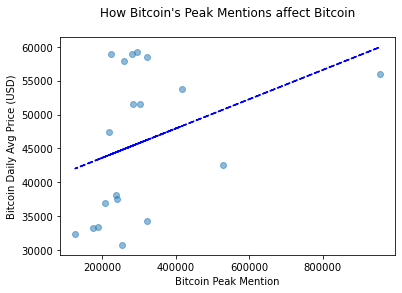

In [15]:
#Bitcoin peak

df_new = df[df.peak == 1]
plt.scatter(df_new['mention_volume'], df_new['price_in_day'], alpha=0.5)
z = np.polyfit(df_new['mention_volume'], df_new['price_in_day'], 1)
p = np.poly1d(z)
plt.plot(df_new['mention_volume'],p(df_new['mention_volume']),"b--")

plt.xlabel('Bitcoin Peak Mention')
plt.ylabel('Bitcoin Daily Avg Price (USD)')
plt.title("How Bitcoin's Peak Mentions affect Bitcoin\n")
plt.show()

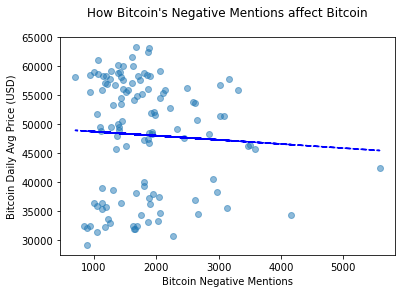

In [16]:
#Bitcoin Negative sentiment

df_new = df

plt.scatter(df_new['negative_volume'], df_new['price_in_day'], alpha=0.5)
z = np.polyfit(df_new['negative_volume'], df_new['price_in_day'], 1)
p = np.poly1d(z)
plt.plot(df_new['negative_volume'],p(df_new['negative_volume']),"b--")

plt.xlabel('Bitcoin Negative Mentions')
plt.ylabel('Bitcoin Daily Avg Price (USD)')
plt.title("How Bitcoin's Negative Mentions affect Bitcoin\n")
plt.show()

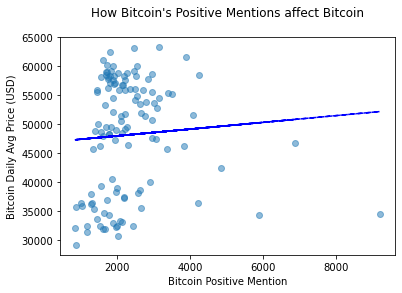

In [17]:
#Bitcoin Positive sentiment
df_new = df

plt.scatter(df_new['positive_volume'], df_new['price_in_day'], alpha=0.5)
z = np.polyfit(df_new['positive_volume'], df_new['price_in_day'], 1)
p = np.poly1d(z)
plt.plot(df_new['positive_volume'],p(df_new['positive_volume']),"b--")

plt.xlabel('Bitcoin Positive Mention')
plt.ylabel('Bitcoin Daily Avg Price (USD)')
plt.title("How Bitcoin's Positive Mentions affect Bitcoin\n")
plt.show()